<a href="https://colab.research.google.com/gist/Sanket758/78586ed83fff2911b9ea5c3804c53dc0/ml_assignment2bi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment:
# Predict automobile price using Machine Learning

Use Machine learning to predict the price of a car based on several characteristics. The objective is to
build a model to understand the factors that drive the car of the price. This will help your automobile
company launch their new car in the market effectively by pricing it better.

**Data description:**   

1. symboling: -3, -2, -1, 0, 1, 2, 3
(Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less),
this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A
value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.)
2. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes- benz,
mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen,
volvo
3. fuel-type: diesel, gas.
4. aspiration: std, turbo.
5. num-of-doors: four, two.
6. body-style: hardtop, wagon, sedan, hatchback, convertible.
7. drive-wheels: 4wd, fwd, rwd.
8. engine-location: front, rear.
9. wheel-base: continuous from 86.6 120.9.
10. length: continuous from 141.1 to 208.1. 11
width: continuous from 60.3 to 72.3.
12. height: continuous from 47.8 to 59.8.
13. curb-weight: continuous from 1488 to 4066.
14. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
15. num-of-cylinders: eight, five, four, six, three, twelve, two.
16. engine-size: continuous from 61 to 326.
17. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
18. bore: continuous from 2.54 to 3.94.
19. stroke: continuous from 2.07 to 4.17.20. compression-ratio: continuous from 7 to 23.
21. horsepower: continuous from 48 to 288.
22. peak-rpm: continuous from 4150 to 6600.
23. city-mpg: continuous from 13 to 49.
24. highway-mpg: continuous from 16 to 54.
25. price: continuous from 5118 to 45400.

## Importing Necessary libraries

In [8]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standard
import os, sys, warnings
warnings.filterwarnings('ignore')

# ML related
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

## Loading our data

In [9]:
df = pd.read_csv('AutoData.csv')
df.head() #prints first 5 rows

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.shape

(205, 25)

ok so 205 records with 25 columns.

In [11]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

price collumn is our output, so leaving that there are 24 columns.

## Automated EDA Report

In [12]:
import sweetviz as sv
my_report = sv.analyze([df,'Data'], target_feat='price')
my_report.show_html('EDAReport.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:16  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report EDAReport.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Basic EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

1. All the collumns have 205 non null values, so there are no missing values in this dataset. good.
2. we have 15 numerical columns and 10 categorical columns

In [14]:
# Lets look at the numerical statistics
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1. looking at the mean and the max values i found that the columns curbweight and peakrpm has really high mean and max values, so we might have to lookout for them while preprocessing.
2. Average price for the car is around 13.2k. 

## Univariate Analysis

Distribution plots are really nice for univariate analysis, it gives you so much information about the data you are working on.

In [15]:
sns.set_style('darkgrid'); #Setting style

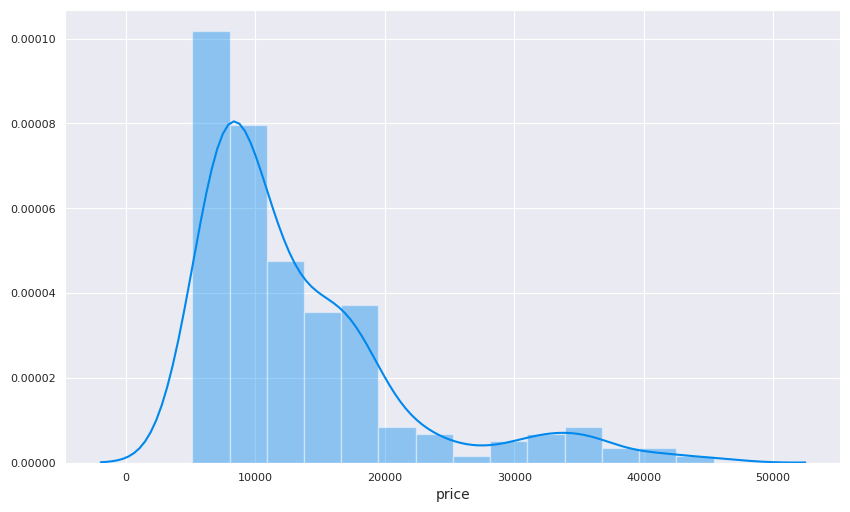

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df.price);

As you can see data in price column in right skewed.
Here the bar indicates the count of values.

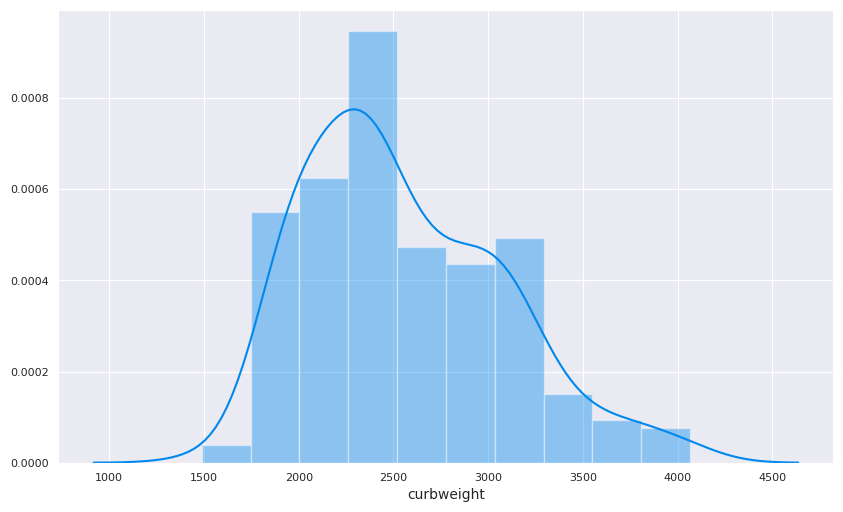

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df.curbweight);

Mean of this distribution is slightly to more left than being in the middle. 

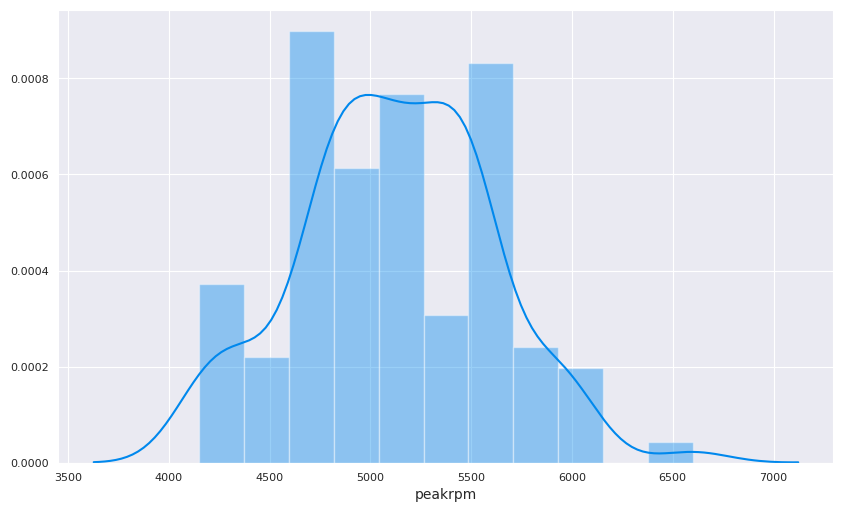

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df.peakrpm);

You can totally see the outlier here, becuase of which distribution is quite tailed at the right hand side.

In [19]:
# Separating numerical and categorical collumns
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

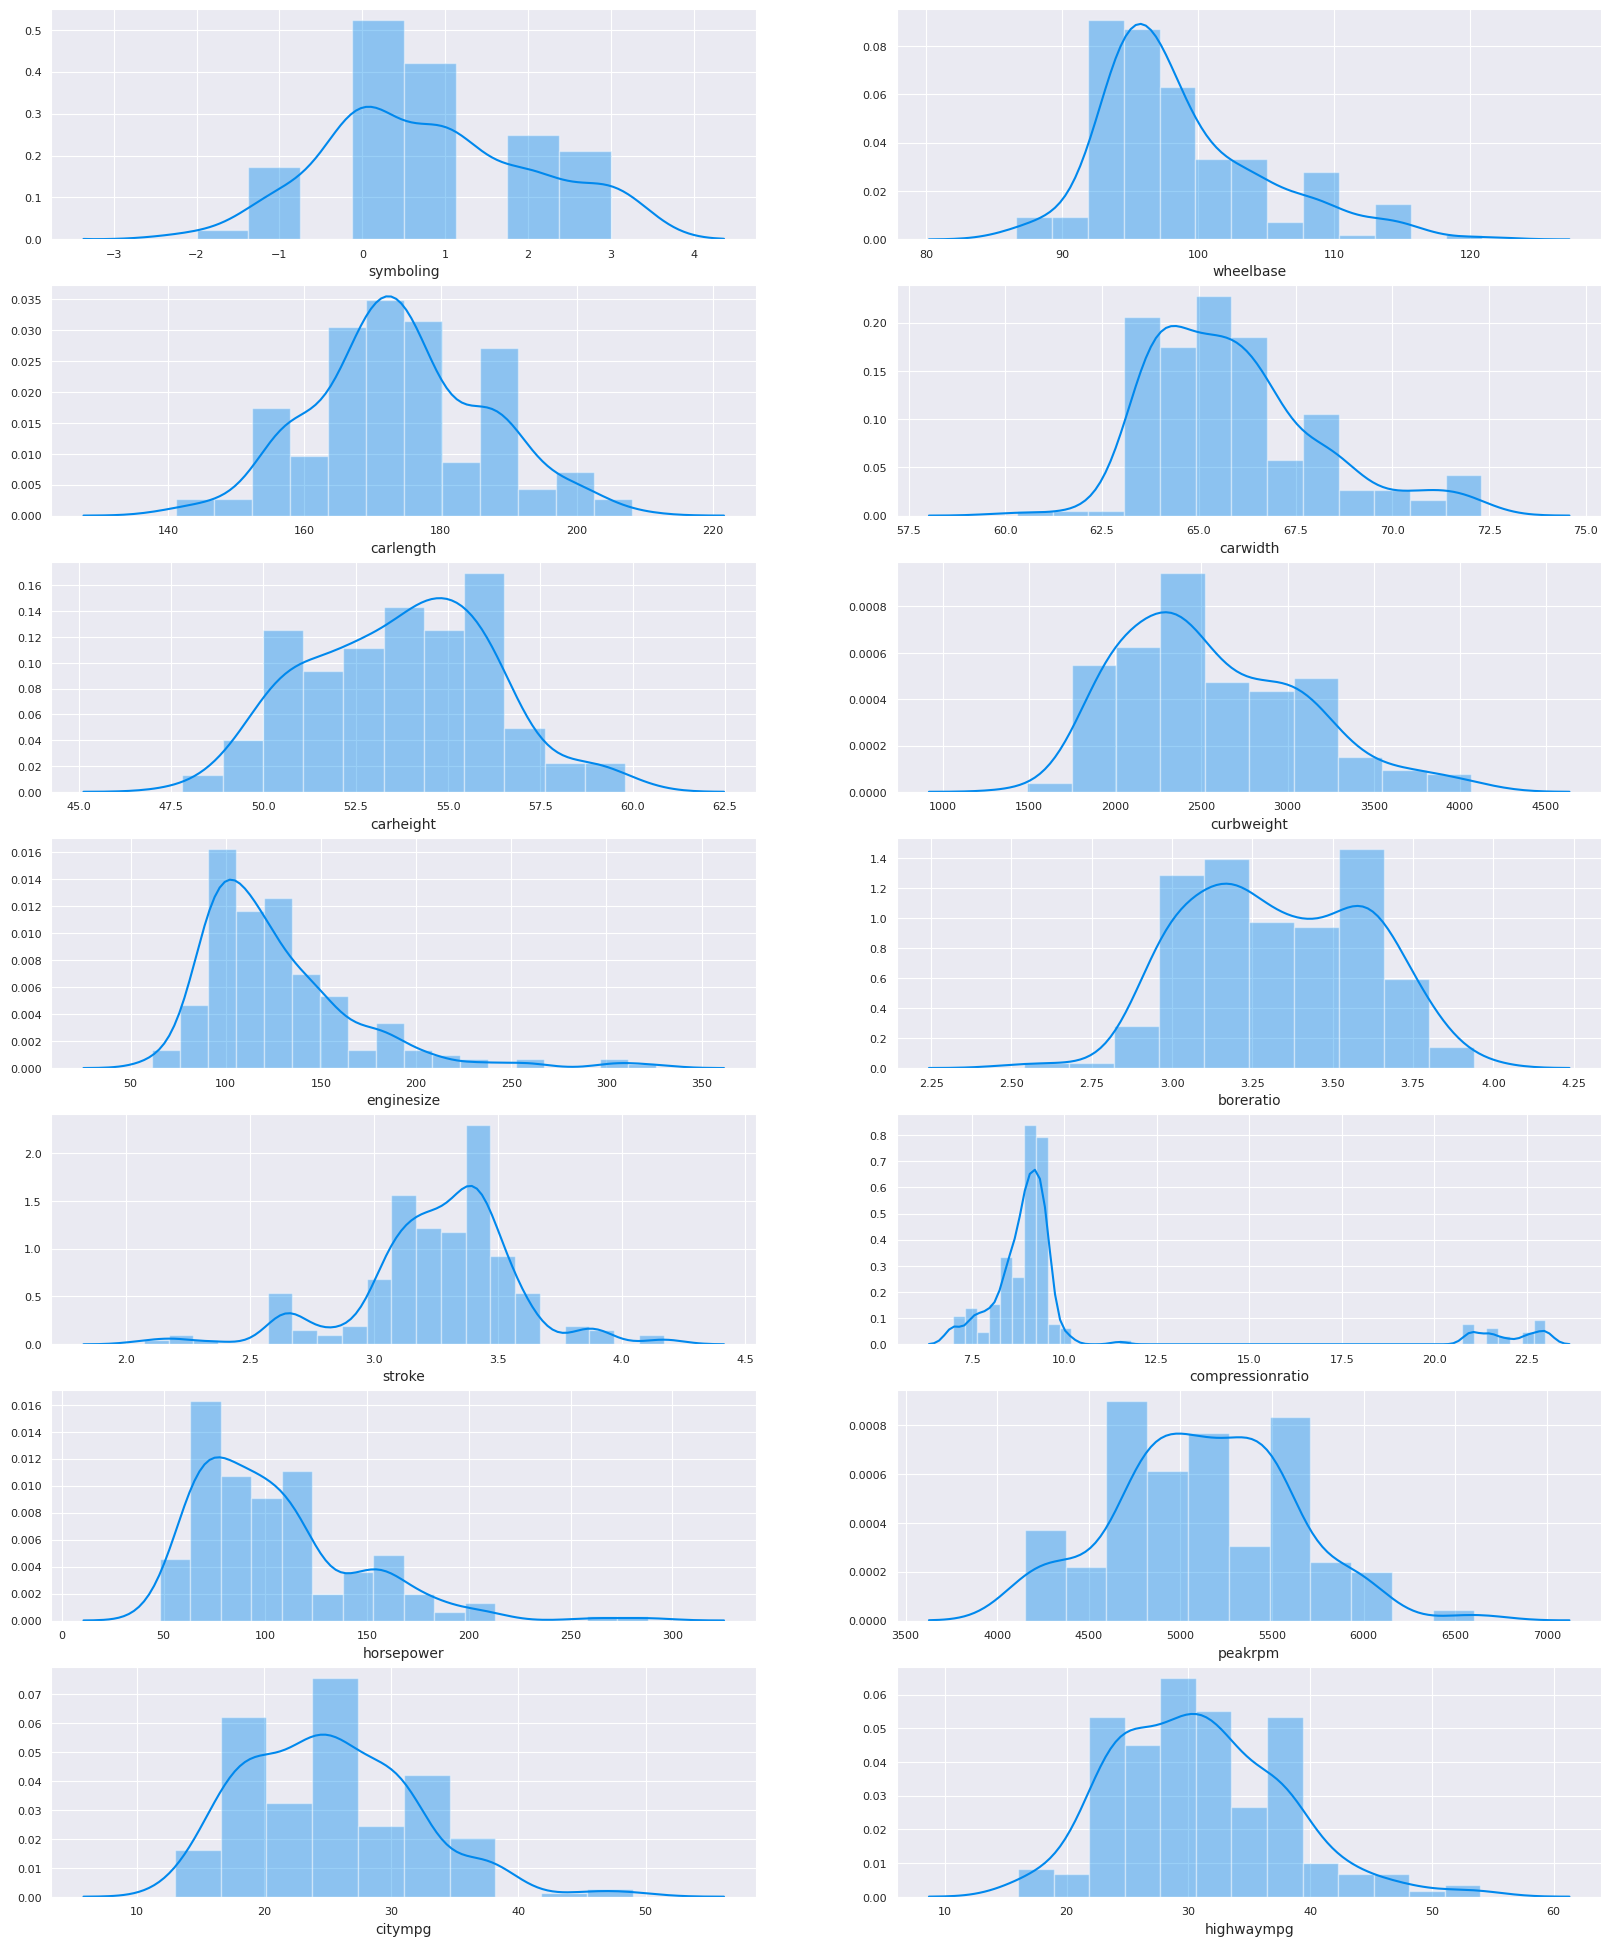

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, numerical_cols)):   
    if col != 'price':    
        sns.distplot(df[col], ax=ax)

We might want to remove symboling collumn because i think it will be best for us. wheelbase and carlength are close to the gaussian distribution. In compress ratrion it can be clearly seen that there are some outliers which disturbs the overall distribution.

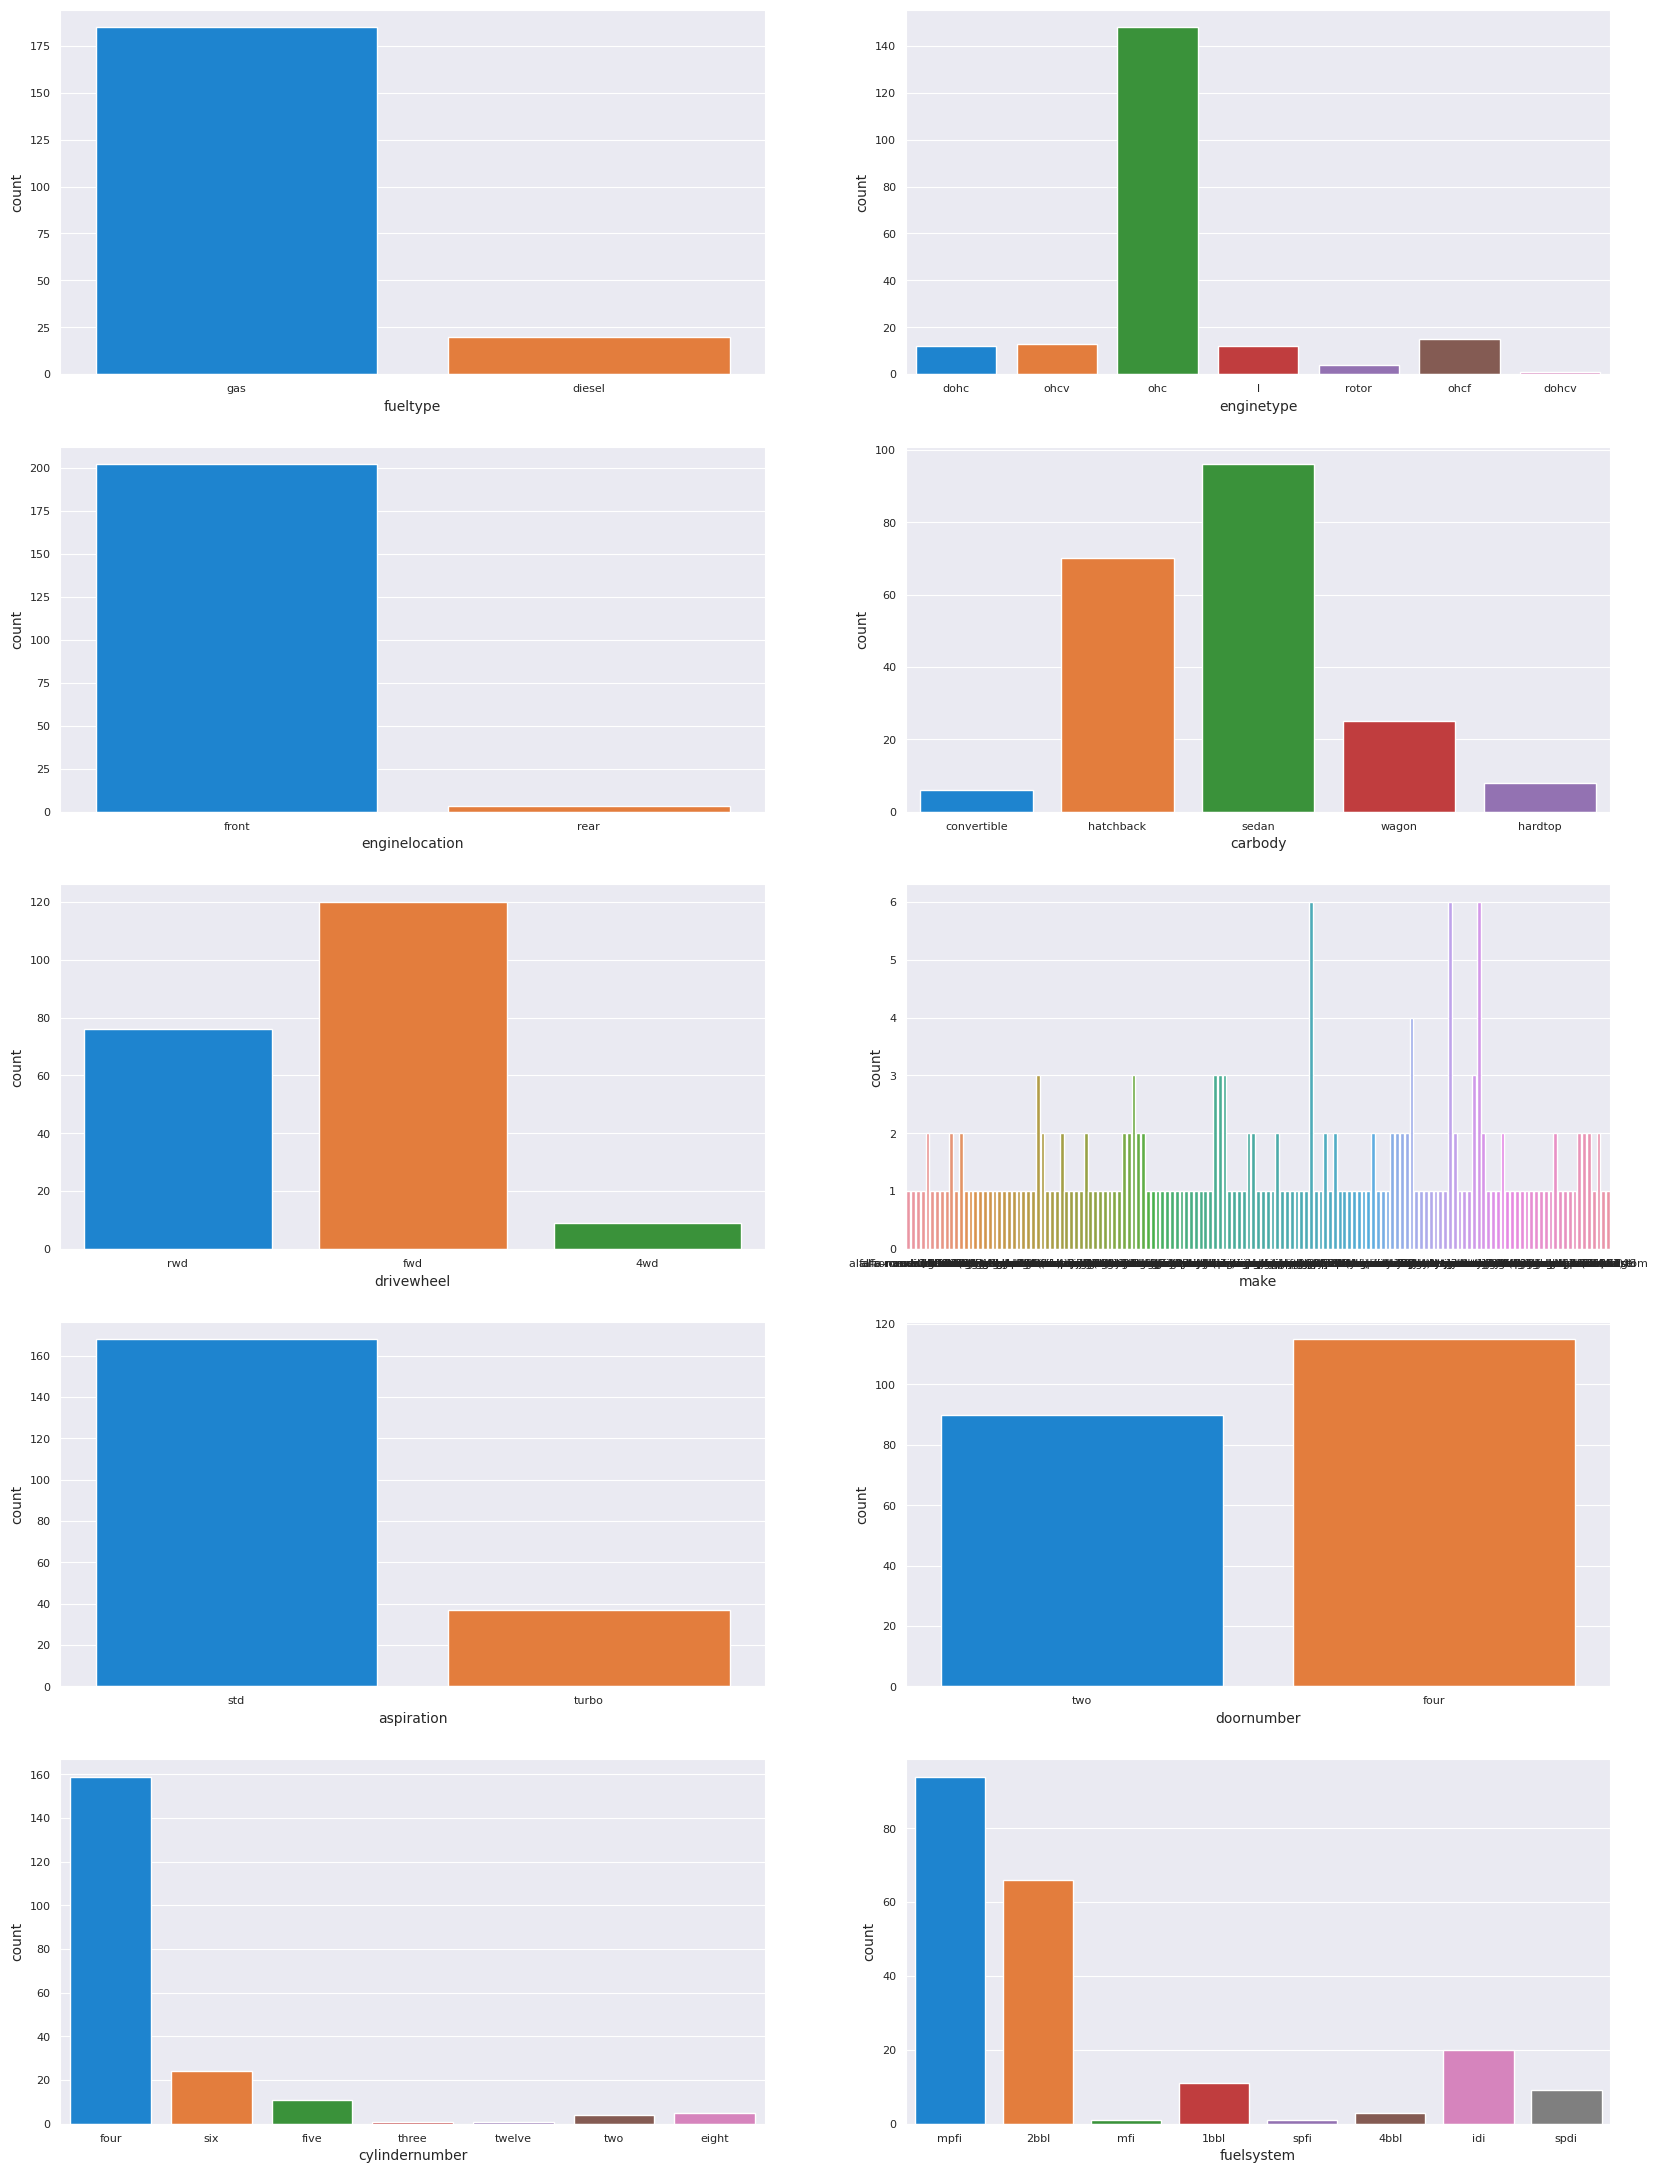

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 28))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.countplot(df[col], ax=ax)

1. we might want to remove 'make' column becuase it has too many unique values. 
2. The engine location column has really high values for front and so less values for rear

In [22]:
print(df.enginelocation.value_counts())
print(df[df.enginelocation == 'front'].price.median())
print(df[df.enginelocation == 'rear'].price.median())

front    202
rear       3
Name: enginelocation, dtype: int64
10221.5
34028.0


As you can see, only for 3 records, value is really high....so we cant simply delete the values, even if it is less.

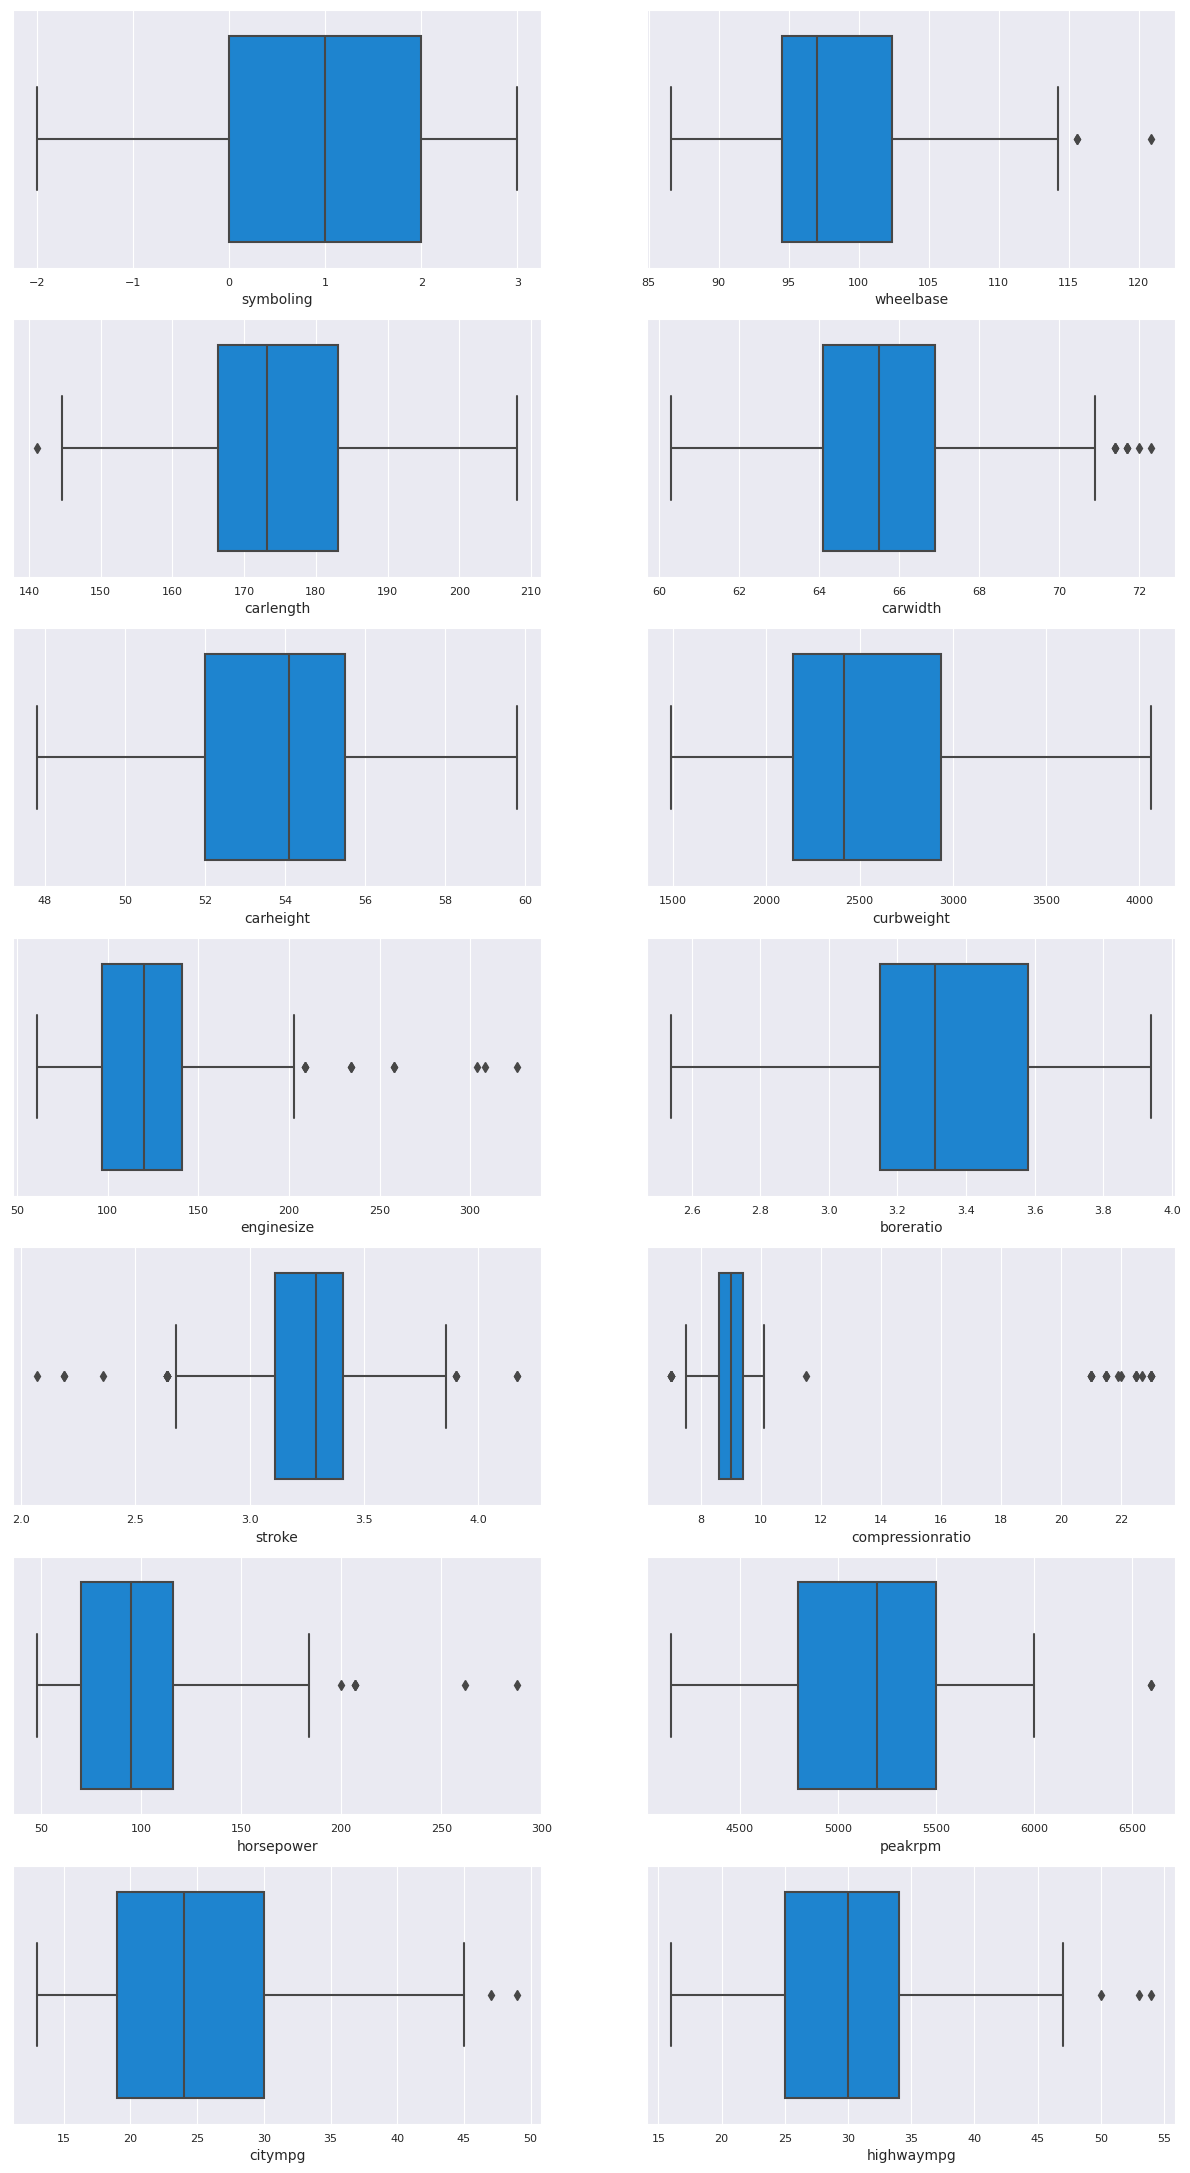

In [23]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 28))

for ax, col in list(zip(axes.flat, numerical_cols)):   
    if col != 'price':    
        sns.boxplot(col, data=df, ax=ax)

There are few outliers in the columns.

## Bi-variate Analysis

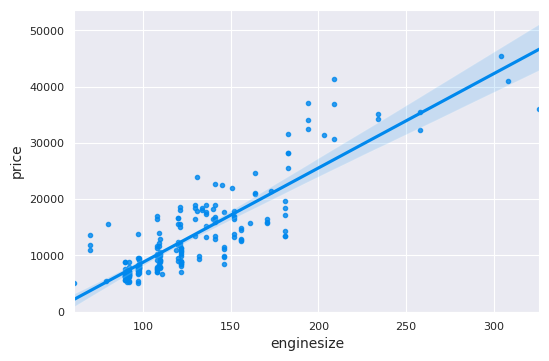

In [24]:
# Engine size as potential predictor variable of price
sns.regplot(x="enginesize", y="price", data=df)
plt.ylim(0,);

**Positive linear relationship:**   
As the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relationship between these two variables.

Highway mpg could potentially be a predictor of price.
As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.

Engine size seems like a pretty good predictor of price, since the regression line is almost a perfectly diagonal line.

(0.0, 48147.526227110204)

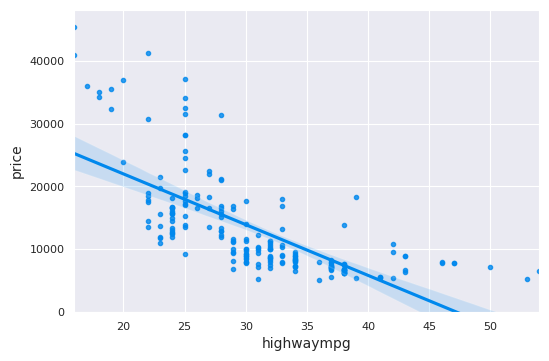

In [25]:
# Highway mpg as a potential predictor variable of price
sns.regplot(x="highwaympg", y="price", data=df)
plt.ylim(0,)

**Negative linear relationship:**  
As the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relationship between these two variables.

Highway mpg could potentially be a predictor of price.

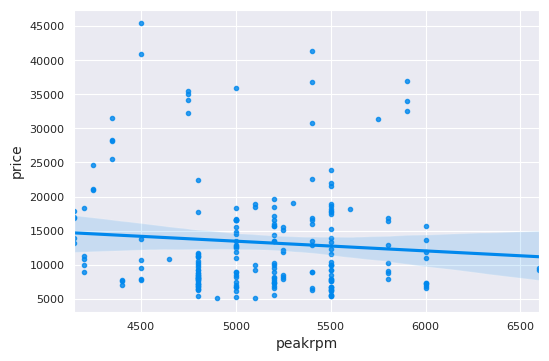

In [26]:
# Peak rpm as a predictor variable of price
sns.regplot(x="peakrpm", y="price", data=df)

**Weak linear relationship:**  
Peak rpm does not seem like a good predictor of price at all, since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing that there is a lot of variability and so it is not a reliable variable.

Let's try this with all the collumns

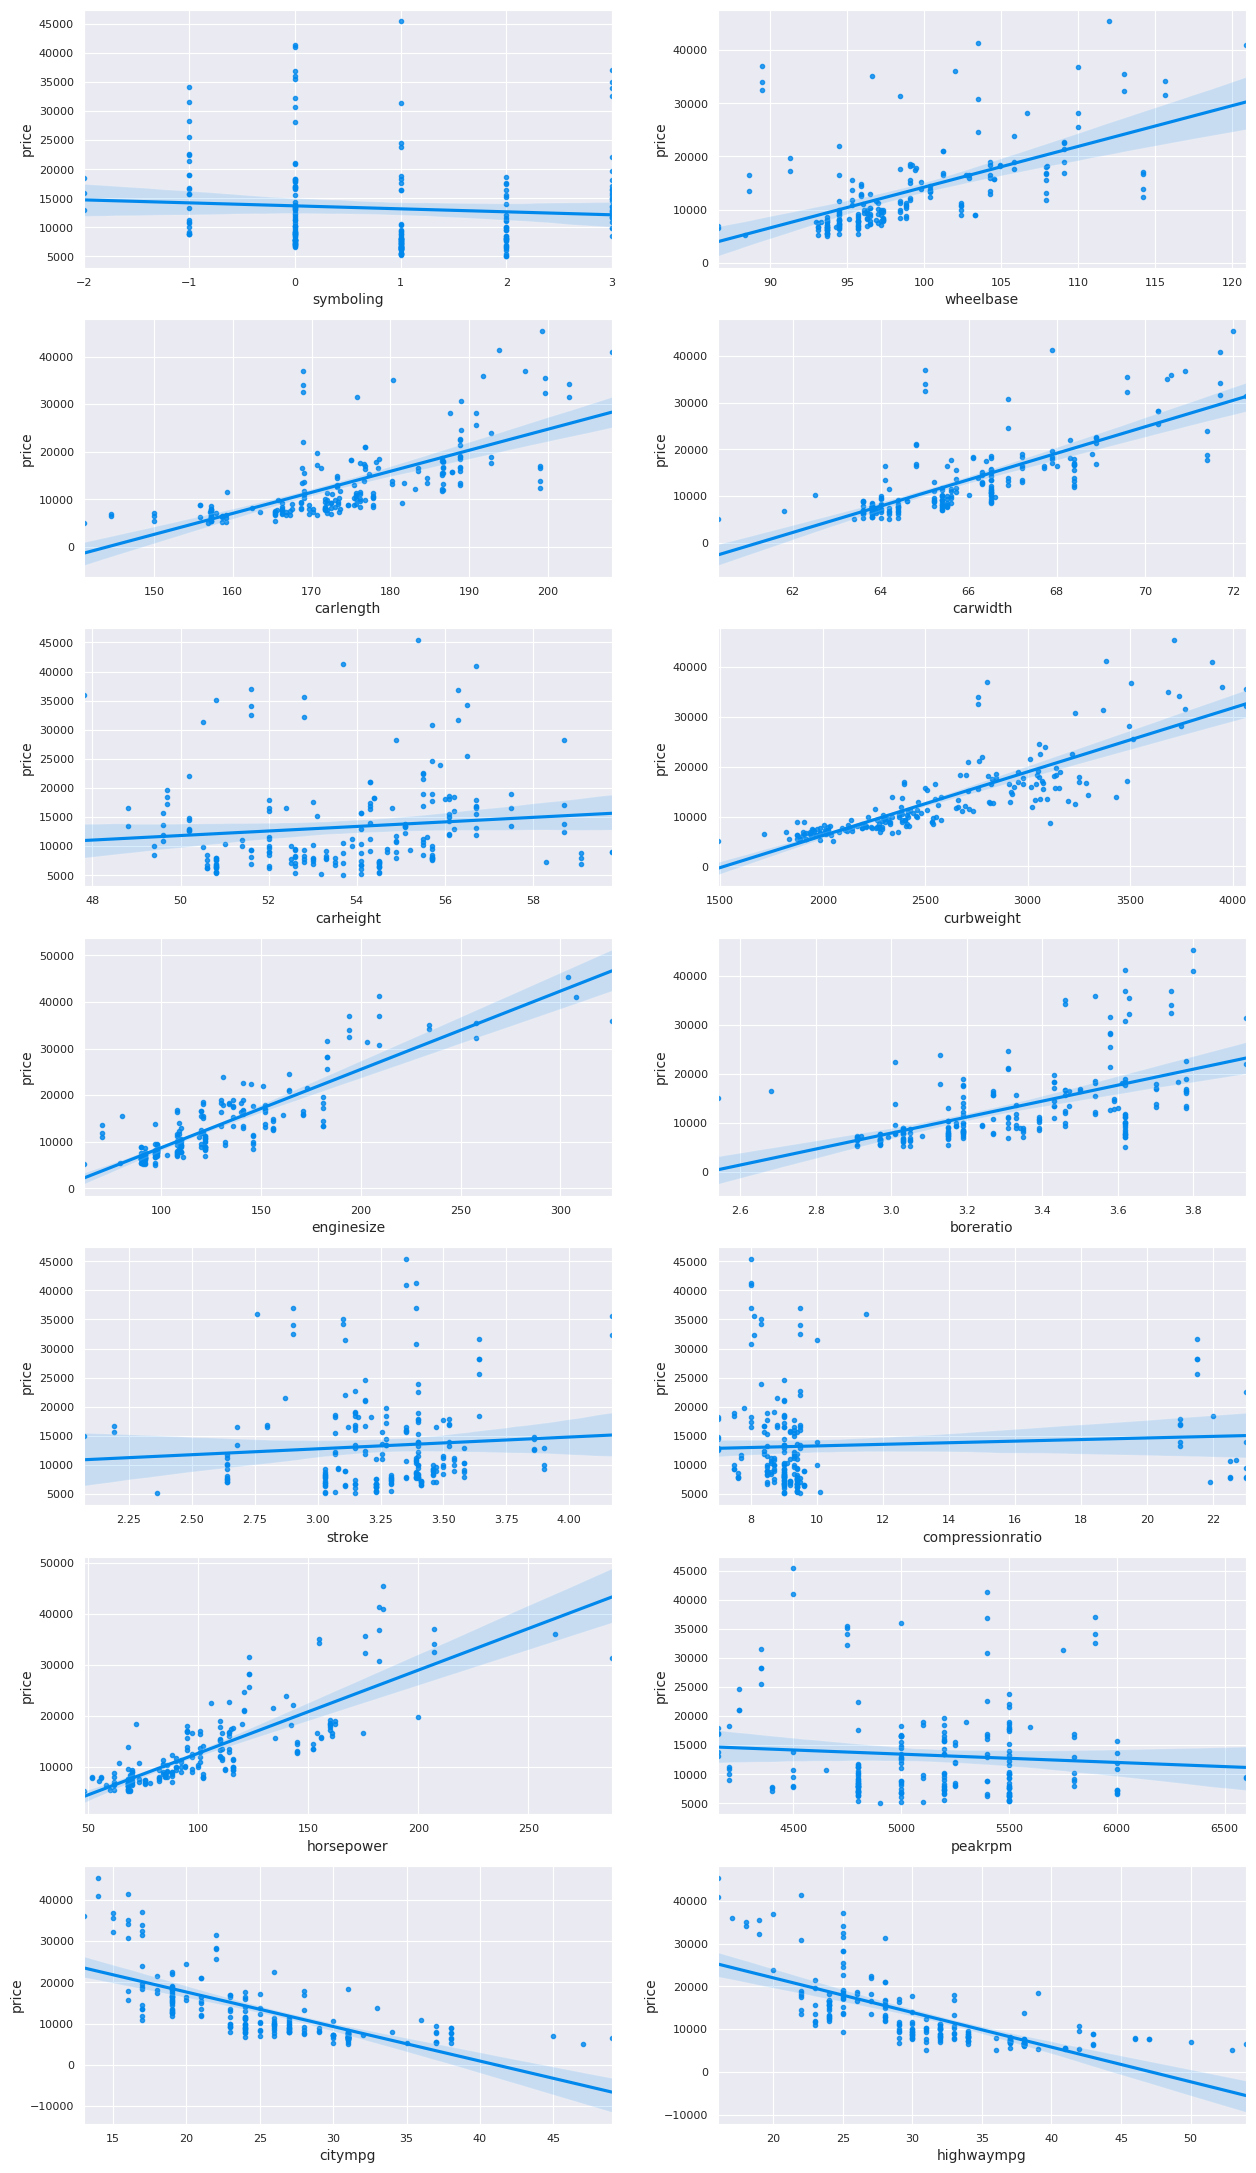

In [27]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 28))

for ax, col in list(zip(axes.flat, numerical_cols)):      
    sns.regplot(col, 'price', data=df, ax=ax)

The features with a straight line shows weak correlation, which means that they wont do any good for our model.

What about categorical collumns?

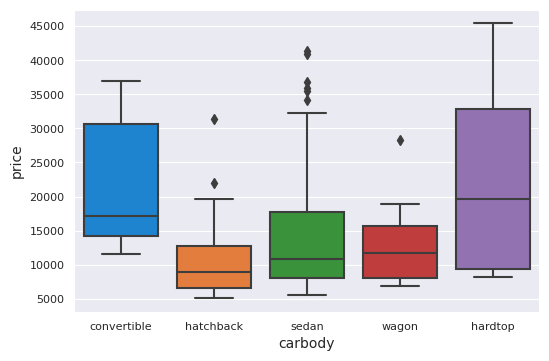

In [28]:
sns.boxplot(x="carbody", y="price", data=df)

We see that the distributions of price between the different body-style categories overlap too much, and so body-style would not be a good predictor of price.

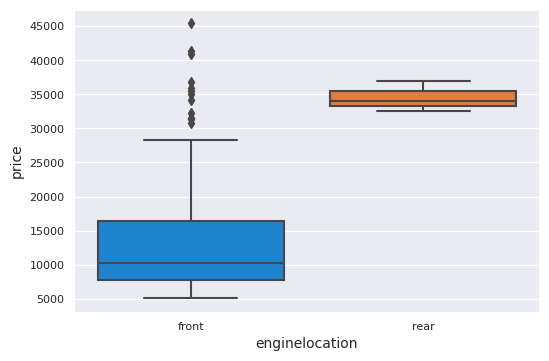

In [29]:
sns.boxplot(x="enginelocation", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price

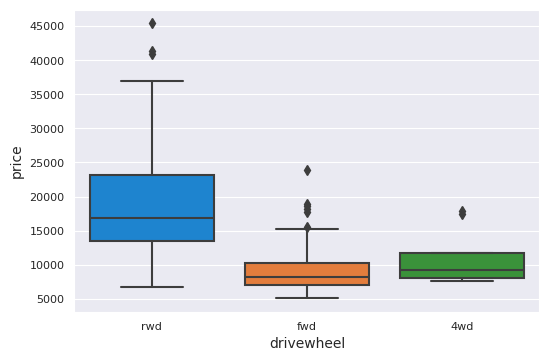

In [30]:
sns.boxplot(x="drivewheel", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs and so drive-wheels could potentially be a predictor of price.

Lets take a look at all the columns

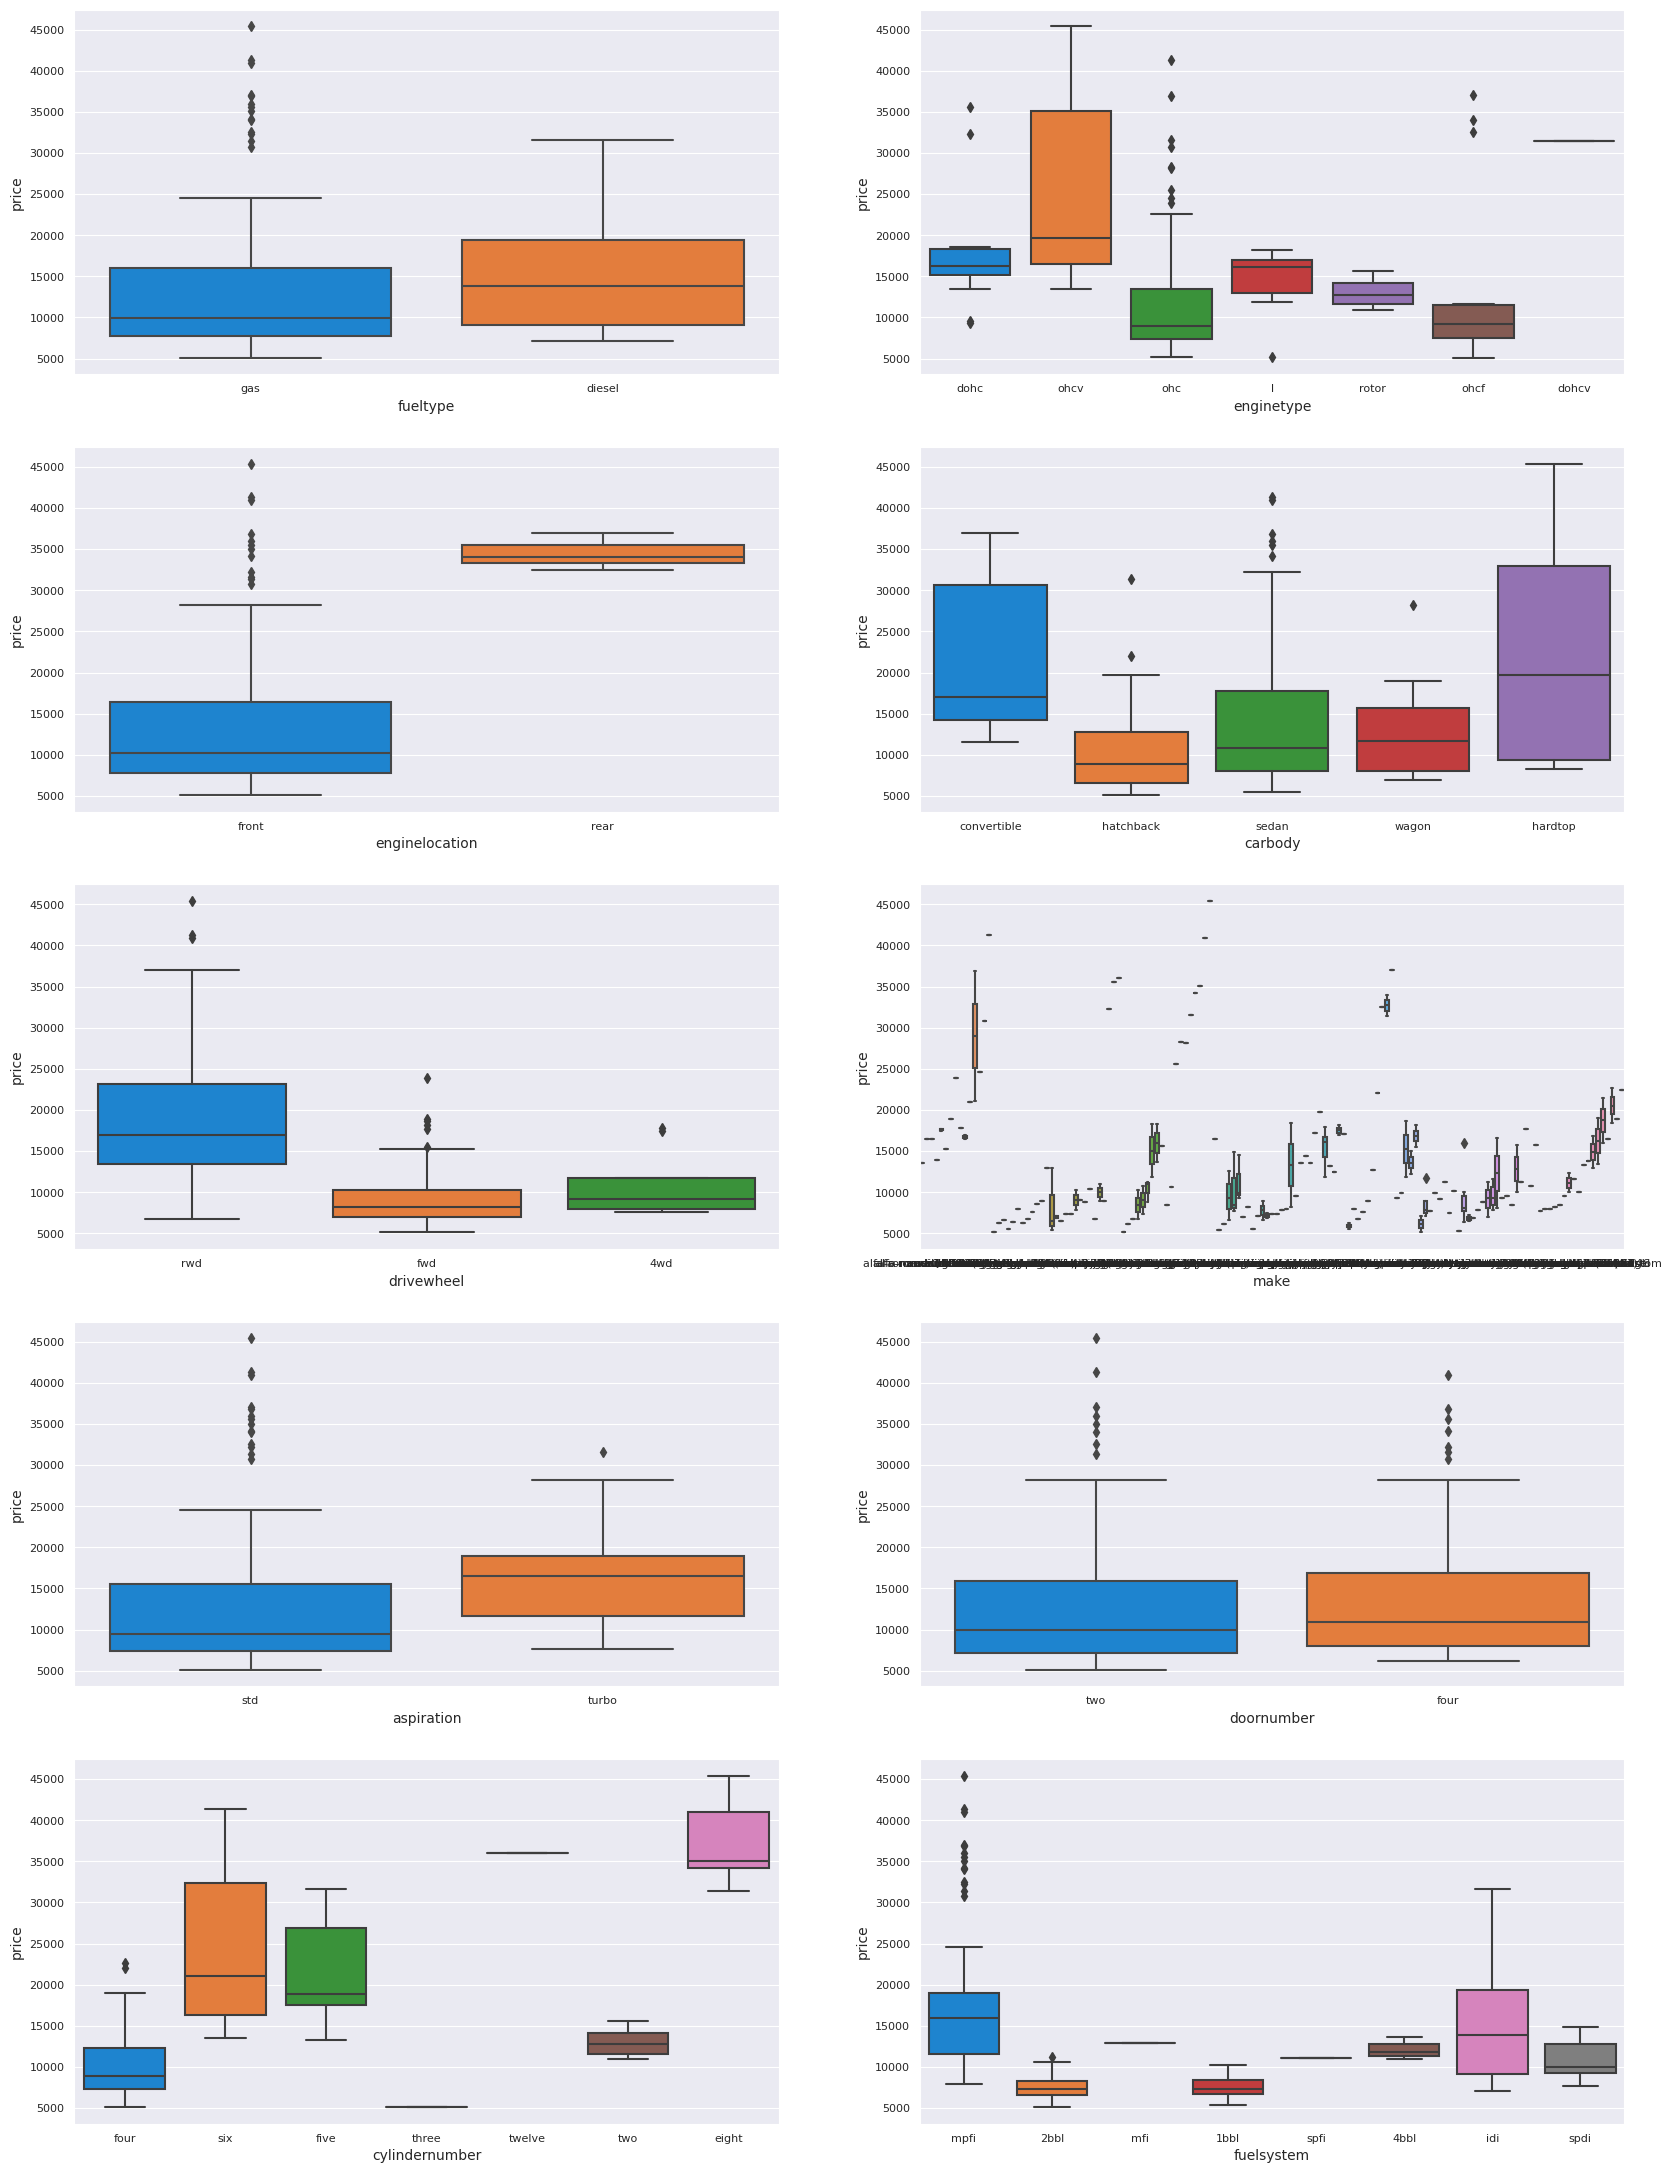

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 28))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.boxplot(x=df[col] , y="price", data=df, ax=ax)

## **Important Categorical Features:**  
enginelocation, carbody, fueltype,cilindernumber, drivewheel


## Data Cleaning

In [98]:
df_cleaned = df.copy(deep=True)

In [99]:
df_cleaned.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [100]:
df_cleaned.drop(['make'], axis=1,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['compressionratio']>12].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['peakrpm']>6000].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['citympg']>45].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['highwaympg']>45].index, inplace=True)

In [101]:
df_cleaned.shape

(180, 24)

## Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:
  
**1**: total positive linear correlation,  
**0**: no linear correlation, the two variables most likely do not affect each other  
**-1**: total negative linear correlation.  

**P-value**: What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is **< 0.001** we say there is **strong** evidence that the correlation is **significant**,  
p-value is < **0.05**, there is **moderate** evidence that the correlation is significant,  
p-value is < **0.1**, there is **weak** evidence that the correlation is significant, and  
p-value is > **0.1**, there is no evidence that the correlation is significant.

In [102]:
from scipy import stats

correlation_table = pd.DataFrame()
correlation_table['features'] = numerical_cols

coeffs = []
p_vs = []
for col in numerical_cols:
        coeff, p = stats.pearsonr(df_cleaned[col], df_cleaned['price'])
        coeffs.append(coeff)
        p_vs.append(p)

correlation_table['Pearson_Correlation'] = coeffs
correlation_table['P_value'] = p_vs

In [103]:
correlation_table

,features,Pearson_Correlation,P_value
0,symboling,-0.009051,9.040219e-01
1,wheelbase,0.546229,2.173024e-15
2,carlength,0.672039,5.283530e-25
3,carwidth,0.742451,8.577412e-33
4,carheight,0.064518,3.895340e-01
5,curbweight,0.833800,8.482601e-48
6,enginesize,0.872371,3.213712e-57
7,boreratio,0.546581,2.068427e-15
8,stroke,0.025504,7.339778e-01
9,compressionratio,-0.163094,2.870196e-02


For wheelbase column the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585) 

For carlength the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

same is for other collumns.

In [104]:
correlation_table[correlation_table['Pearson_Correlation'] > 0.5] #Collumns which have strong positive relationship

,features,Pearson_Correlation,P_value
1,wheelbase,0.546229,2.173024e-15
2,carlength,0.672039,5.283530e-25
3,carwidth,0.742451,8.577412e-33
5,curbweight,0.833800,8.482601e-48
6,enginesize,0.872371,3.213712e-57
7,boreratio,0.546581,2.068427e-15
10,horsepower,0.839888,4.084386e-49
14,price,1.000000,0.000000e+00


In [105]:
correlation_table[correlation_table['Pearson_Correlation'] < -0.5] #Collumns which have strong negative relationship

,features,Pearson_Correlation,P_value
12,citympg,-0.758091,7.051888e-35
13,highwaympg,-0.760739,3.017076e-35


**Important Numerical Features**

wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg

## Data Preparation

In [106]:
# These Are the final Features
categorical_cols_new = ['enginelocation', 'carbody', 'fueltype','cylindernumber', 'drivewheel']
numerical_cols_new = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
              'boreratio', 'horsepower', 'citympg', 'highwaympg']

In [107]:
df_final = df_cleaned[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
              'boreratio', 'horsepower', 'citympg', 'highwaympg','enginelocation',
              'carbody', 'fueltype','cylindernumber', 'drivewheel','price']]
df_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,enginelocation,carbody,fueltype,cylindernumber,drivewheel,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,front,convertible,gas,four,rwd,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,front,convertible,gas,four,rwd,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,front,hatchback,gas,six,rwd,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,front,sedan,gas,four,fwd,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,front,sedan,gas,five,4wd,17450.0


## One Hot Encoding

In [108]:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,0,0,0,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,0,0,0,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,0,1,0,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,0,0,1,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,0,0


## Min-Max Scaling


In [109]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_final[numerical_cols_new] = sc.fit_transform(df_final[numerical_cols_new])

In [110]:
df_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,0.058309,0.381102,0.219048,0.324433,0.234375,0.664286,0.223684,0.32,0.407407,13495.0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.058309,0.381102,0.219048,0.324433,0.234375,0.664286,0.223684,0.32,0.407407,16500.0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.230321,0.418898,0.352381,0.446818,0.320312,0.100000,0.412281,0.24,0.370370,16500.0,0,0,1,0,0,0,0,1,0,0,0,1
3,0.384840,0.503937,0.419048,0.230530,0.152344,0.464286,0.184211,0.44,0.518519,13950.0,0,0,0,1,0,0,1,0,0,0,1,0
4,0.373178,0.503937,0.438095,0.447263,0.257812,0.464286,0.241228,0.20,0.222222,17450.0,0,0,0,1,0,1,0,0,0,0,0,0


## Univariate Linear Regression

In [111]:
X = df[['enginesize']]
y = df[['price']]

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [113]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7072521513680088

So as you can see by using only one variable 'Engine Size' we got R2 value of 0.70

##Multiple Linear Regression

## Train Test Split

In [114]:
y = df_final.pop('price')
X = df_final #all columns

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [116]:
X_train.shape, X_test.shape

((144, 21), (36, 21))

In [117]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [118]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
preds = clf.predict(X_test)

In [120]:
clf.score(X_test,y_test) #R2 score

0.799353850198403

By using all the selected feature we have R2 value of 0.79 which is really good.